In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
main = pd.read_csv('Table_8_Offenses_Known_to_Law_Enforcement_by_State_by_City_2013-2.csv')

In [3]:
main.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,ALABAMA,Abbeville,"2,645",11,1.0,1,NaN,2,7,63,21,39,3,NaN,NaN,NaN,NaN
1,NaN,Adamsville,"4,481",19,1.0,0,NaN,7,11,321,58,252,11,NaN,NaN,NaN,
2,NaN,Addison,744,1,0.0,1,NaN,0,0,25,6,17,2,NaN,NaN,NaN,
3,NaN,Alabaster,"31,170",44,0.0,2,NaN,11,31,640,70,544,26,NaN,NaN,NaN,NaN
4,NaN,Alexander City,"14,692",119,2.0,16,NaN,12,89,661,121,510,30,NaN,NaN,NaN,NaN


In [4]:
# This is a big dataset with a lot of items that need to be cleaned up.  Let's clean up the data so that we can use it for our models.
crime_main = main.drop([9291, 9292, 9293, 9294, 9295, 9296, 9297, 9298, 9299, 9300])

In [5]:
main.columns

Index(['State', 'City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [6]:
columns = ['State','City', 'Population', 'Violent_Crimes', 'Murder', 'Rape_revdef', 'Rape_olddef', 'Robbery', 'Assault', 'Property_Crime', 
              'Burglary', 'Larceny', 'MV_Theft', 'Arson', 'Unnamed 14', 'Unnamed 15', 'Unnamed 16']

In [7]:
crime_main.columns=columns
crime_main[columns]=crime_main[columns].replace(',', '', regex=True)
crime_main.drop(["State","Rape_revdef","Unnamed 14","Unnamed 15", "Unnamed 16"], axis = 1, inplace = True) 

In [8]:
crime_main.fillna("")

,City,Population,Violent_Crimes,Murder,Rape_olddef,Robbery,Assault,Property_Crime,Burglary,Larceny,MV_Theft,Arson
0,Abbeville,2645,11,1,,2,7,63,21,39,3,
1,Adamsville,4481,19,1,,7,11,321,58,252,11,
2,Addison,744,1,0,,0,0,25,6,17,2,
3,Alabaster,31170,44,0,,11,31,640,70,544,26,
4,Alexander City,14692,119,2,,12,89,661,121,510,30,
5,Aliceville,2419,7,0,,2,5,48,16,26,6,
6,Andalusia,9079,34,1,,6,23,491,95,379,17,
7,Anniston,22648,461,5,,78,339,1988,770,1120,98,
8,Arab,8295,32,0,,4,23,640,166,414,60,
9,Ardmore,1304,2,0,,0,2,31,7,23,1,


In [9]:
crime_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9292 entries, 0 to 9301
Data columns (total 12 columns):
City              9291 non-null object
Population        9288 non-null object
Violent_Crimes    9287 non-null object
Murder            9291 non-null float64
Rape_olddef       3858 non-null object
Robbery           9291 non-null object
Assault           9288 non-null object
Property_Crime    9287 non-null object
Burglary          9289 non-null object
Larceny           9289 non-null object
MV_Theft          9291 non-null object
Arson             8818 non-null object
dtypes: float64(1), object(11)
memory usage: 943.7+ KB


In [10]:
crime_main.shape

(9292, 12)

### We have multiple columns that are objects. For our model to work a little smoother, converting objects to floats will be crucial.

In [11]:
crime_main = crime_main.dropna(how='any')

In [12]:
crime_main[['Population','Violent_Crimes','Murder','Rape_olddef','Robbery','Assault','Property_Crime','Burglary','Larceny','MV_Theft','Arson']] = crime_main[['Population','Violent_Crimes','Murder','Rape_olddef','Robbery','Assault','Property_Crime','Burglary','Larceny','MV_Theft','Arson']].apply(pd.to_numeric, errors='coerce')

In [13]:
crime_main.dtypes

City               object
Population          int64
Violent_Crimes      int64
Murder            float64
Rape_olddef         int64
Robbery             int64
Assault             int64
Property_Crime      int64
Burglary            int64
Larceny             int64
MV_Theft            int64
Arson               int64
dtype: object

In [14]:
crime_main.describe()

,Population,Violent_Crimes,Murder,Rape_olddef,Robbery,Assault,Property_Crime,Burglary,Larceny,MV_Theft,Arson
count,3.577000e+03,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,2.732648e+04,111.441431,1.331283,6.902712,38.839530,64.367906,860.383841,183.402572,592.568912,84.412357,4.620352
std,1.067369e+05,671.883150,9.119399,34.115576,293.878007,351.966982,3950.154028,861.598266,2639.891108,523.163726,32.362039
min,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.889000e+03,3.000000,0.000000,0.000000,0.000000,2.000000,47.000000,10.000000,34.000000,1.000000,0.000000
50%,7.677000e+03,12.000000,0.000000,1.000000,2.000000,8.000000,164.000000,32.000000,121.000000,6.000000,0.000000
75%,2.182800e+04,47.000000,0.000000,4.000000,11.000000,30.000000,548.000000,109.000000,403.000000,26.000000,2.000000
max,3.878725e+06,20993.000000,251.000000,764.000000,9891.000000,10270.000000,110919.000000,23733.000000,73591.000000,14382.000000,1430.000000


Text(0.5, 1.05, 'Correlation of Crime')

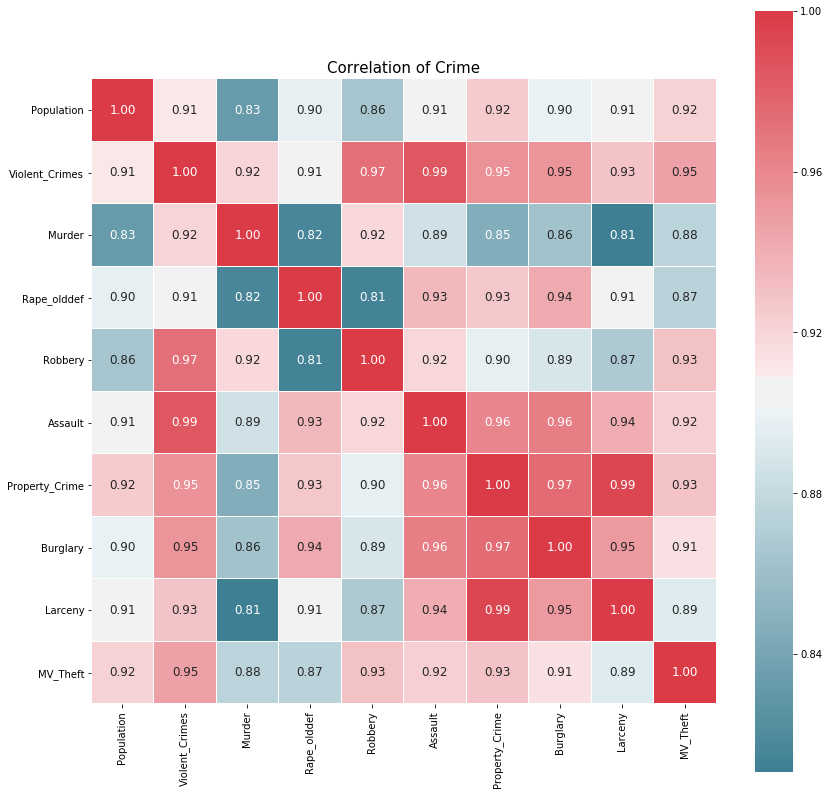

In [15]:
corr = crime_main.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Crime', y=1.05, size=15)

In [16]:
#Copy the main dataframe for our modeling purposes
crime = crime_main.copy()

In [17]:
#Let's create some new features
model = pd.DataFrame()

model['population_log'] = np.log(crime.Population)
model['property_crime_rate'] = crime.Property_Crime/crime.Population
model['population'] = crime.Population
model['murder_rate'] = crime.Murder/crime.Population
model['robbery_rate'] = crime.Robbery/crime.Population
model['assault_rate'] = crime.Assault/crime.Population
model['burglary_rate'] = crime.Burglary/crime.Population
model['rape_rate'] = crime.Rape_olddef/crime.Population
model['arson_rate'] = crime.Arson/crime.Population
model['mv_theft_rate'] = crime.MV_Theft/crime.Population

model.head(10)

,population_log,property_crime_rate,population,murder_rate,robbery_rate,assault_rate,burglary_rate,rape_rate,arson_rate,mv_theft_rate
223,8.605753,0.039722,5463,0.000183,0.000000,0.013180,0.001464,0.000183,0.000000,0.001281
224,10.927915,0.023838,55710,0.000018,0.000305,0.000539,0.005995,0.000018,0.000144,0.001239
225,10.586003,0.043359,39577,0.000000,0.000632,0.001289,0.009172,0.000000,0.000278,0.002552
226,9.300364,0.023670,10942,0.000000,0.000000,0.002833,0.005209,0.000183,0.000000,0.001554
227,10.820938,0.039454,50058,0.000100,0.001139,0.003096,0.009469,0.000240,0.000739,0.001718
228,12.424075,0.023722,248718,0.000008,0.000651,0.001443,0.003992,0.000209,0.000310,0.001122
229,9.291920,0.019078,10850,0.000092,0.000184,0.004240,0.003134,0.000092,0.000000,0.000922
230,8.316300,0.012469,4090,0.000000,0.000000,0.000978,0.004645,0.000244,0.000244,0.000000
231,8.160232,0.012003,3499,0.000000,0.000000,0.003144,0.002286,0.000000,0.000000,0.000857
232,9.377548,0.056007,11820,0.000000,0.001100,0.004061,0.012183,0.000423,0.000338,0.002538


Text(0.5, 1.05, 'Correlation of Crime')

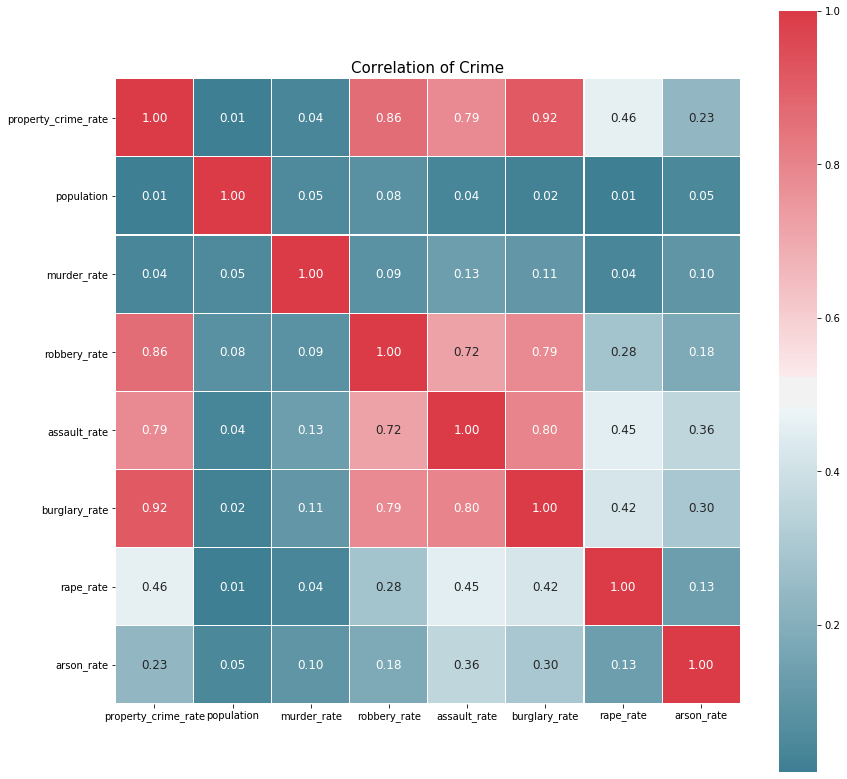

In [18]:
corr = model.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Crime', y=1.05, size=15)

### Initial Model Set Up

In [19]:
model.head()

,population_log,property_crime_rate,population,murder_rate,robbery_rate,assault_rate,burglary_rate,rape_rate,arson_rate,mv_theft_rate
223,8.605753,0.039722,5463,0.000183,0.000000,0.013180,0.001464,0.000183,0.000000,0.001281
224,10.927915,0.023838,55710,0.000018,0.000305,0.000539,0.005995,0.000018,0.000144,0.001239
225,10.586003,0.043359,39577,0.000000,0.000632,0.001289,0.009172,0.000000,0.000278,0.002552
226,9.300364,0.023670,10942,0.000000,0.000000,0.002833,0.005209,0.000183,0.000000,0.001554
227,10.820938,0.039454,50058,0.000100,0.001139,0.003096,0.009469,0.000240,0.000739,0.001718


In [20]:
model = model.replace([np.inf, -np.inf], np.nan).dropna(how="all")

In [21]:
model.describe()

,population_log,property_crime_rate,population,murder_rate,robbery_rate,assault_rate,burglary_rate,rape_rate,arson_rate,mv_theft_rate
count,3577.000000,3577.000000,3.577000e+03,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,9.011270,0.028315,2.732648e+04,0.000027,0.000611,0.001880,0.005791,0.000218,0.000114,0.001969
std,1.456068,0.093691,1.067369e+05,0.000106,0.002490,0.003442,0.010545,0.000710,0.000303,0.022989
min,1.609438,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.968666,0.011966,2.889000e+03,0.000000,0.000000,0.000368,0.002137,0.000000,0.000000,0.000246
50%,8.945984,0.020907,7.677000e+03,0.000000,0.000242,0.001046,0.004212,0.000073,0.000000,0.000803
75%,9.990949,0.033449,2.182800e+04,0.000000,0.000720,0.002443,0.007423,0.000281,0.000130,0.001793
max,15.171017,4.668161,3.878725e+06,0.002928,0.113043,0.130045,0.493274,0.032258,0.008436,1.013453


In [22]:
y = model['property_crime_rate']
X = model[['murder_rate','population_log','robbery_rate']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#### We have set up our intial model, along with the test-train data.  Let's fit into our training data.

In [23]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X_train, y_train))


Coefficients: 
 [-2.83629584e+01 -1.04713876e-02  5.04522154e+01]

Intercept: 
 0.09442729872868841

R-Squared:
0.8710074868840396


In [24]:
train_summary = pd.concat([X_train, y_train], axis=1)
lf = 'property_crime_rate ~ murder_rate + population_log + robbery_rate'
lm = smf.ols(formula=lf, data=train_summary).fit()
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     property_crime_rate   R-squared:                       0.871
Model:                             OLS   Adj. R-squared:                  0.871
Method:                  Least Squares   F-statistic:                     4015.
Date:                 Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                         15:55:15   Log-Likelihood:                 3204.8
No. Observations:                 1788   AIC:                            -6402.
Df Residuals:                     1784   BIC:                            -6380.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0944      0.0

#### Time to check our assumptions

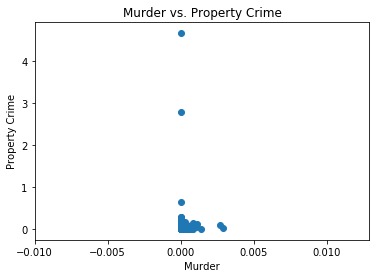

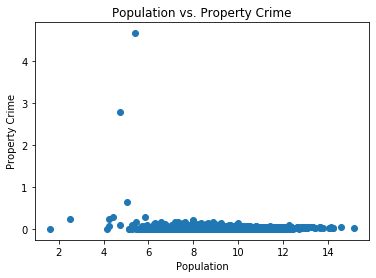

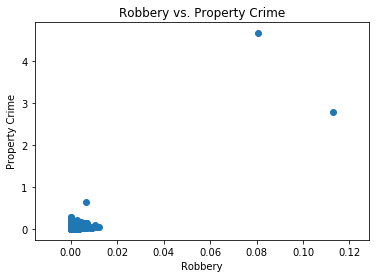

In [25]:
plt.scatter(y=model['property_crime_rate'], x=model['murder_rate'])
plt.ylabel('Property Crime')
plt.xlabel('Murder')
plt.title('Murder vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime_rate'], x=model['population_log'])
plt.ylabel('Property Crime')
plt.xlabel('Population')
plt.title('Population vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime_rate'], x=model['robbery_rate'])
plt.ylabel('Property Crime')
plt.xlabel('Robbery')
plt.title('Robbery vs. Property Crime')
plt.show()

#### Multivariate Normality

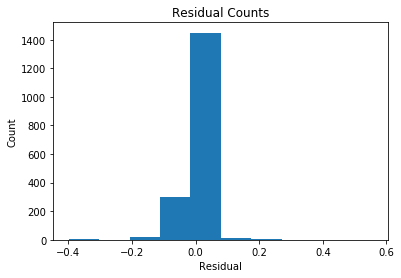

In [26]:
predict = regr.predict(X_train).ravel()
actual = y_train
left = actual - predict

plt.hist(left)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#### Homoscedasticity

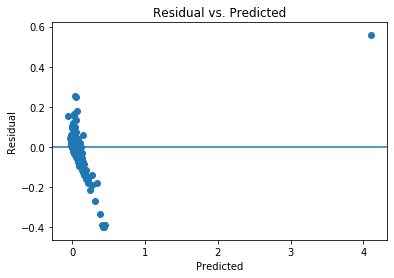

In [27]:
plt.scatter(predict, left)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

#### Low Multicollinearity

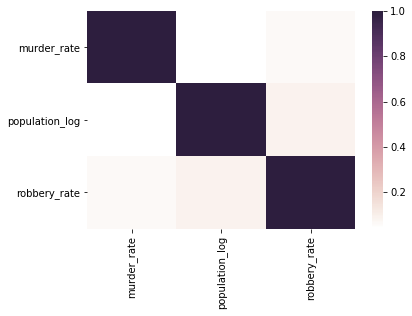

In [28]:
correlation_matrix = X_train.corr()
multicollinearity = sns.heatmap(correlation_matrix,cmap=sns.cubehelix_palette(light=1, as_cmap=True))
ticks = plt.xticks(rotation=90)

### How can we make our model better?  As you see above, we were only looking at 2 of the features provided in the data.  What happens if we bring in other features?  We will include more crime indicators:  Assault, Rape, Larceny, Burglary, Arson, Violent Crimes, and Motor Vehicle Theft

In [29]:
y = model['property_crime_rate']
X = model[['assault_rate','rape_rate','burglary_rate','arson_rate','population_log','mv_theft_rate']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [31]:
train_sum = pd.concat([X_train, y_train], axis=1)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X_train, y_train))


Coefficients: 
 [ 5.23116761e-01  5.29028515e+00  2.41959283e+00 -2.16797368e+00
 -1.04814887e-03  3.26632517e+00]

Intercept: 
 0.0158019968508511

R-Squared:
0.979869942737004


In [32]:
lf = 'property_crime_rate ~ assault_rate + rape_rate + burglary_rate + arson_rate + population_log + mv_theft_rate'
lm = smf.ols(formula=lf, data=train_sum).fit()
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     property_crime_rate   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.980
Method:                  Least Squares   F-statistic:                 1.445e+04
Date:                 Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                         15:55:17   Log-Likelihood:                 4865.5
No. Observations:                 1788   AIC:                            -9717.
Df Residuals:                     1781   BIC:                            -9679.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0158      0.0

### Recheck our relationships

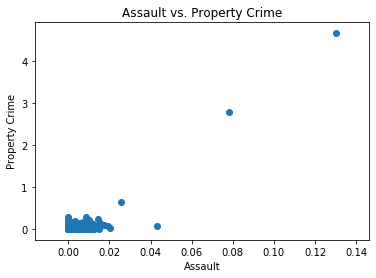

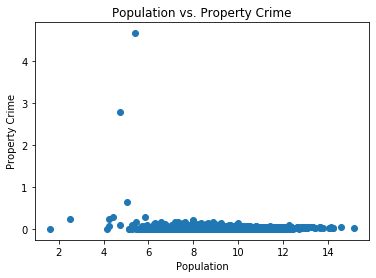

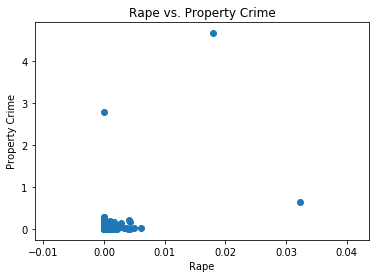

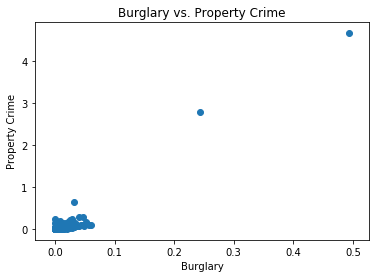

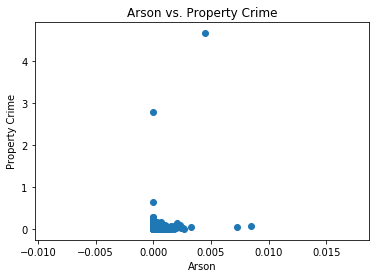

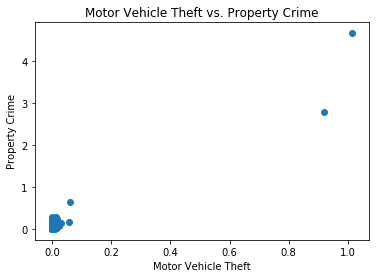

In [33]:
plt.scatter(y=model['property_crime_rate'], x=model['assault_rate'])
plt.ylabel('Property Crime')
plt.xlabel('Assault')
plt.title('Assault vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime_rate'], x=model['population_log'])
plt.ylabel('Property Crime')
plt.xlabel('Population')
plt.title('Population vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime_rate'], x=model['rape_rate'])
plt.ylabel('Property Crime')
plt.xlabel('Rape')
plt.title('Rape vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime_rate'], x=model['burglary_rate'])
plt.ylabel('Property Crime')
plt.xlabel('Burglary')
plt.title('Burglary vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime_rate'], x=model['arson_rate'])
plt.ylabel('Property Crime')
plt.xlabel('Arson')
plt.title('Arson vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime_rate'], x=model['mv_theft_rate'])
plt.ylabel('Property Crime')
plt.xlabel('Motor Vehicle Theft')
plt.title('Motor Vehicle Theft vs. Property Crime')
plt.show()

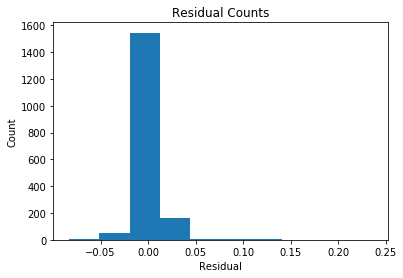

In [34]:
predict = regr.predict(X_train).ravel()
actual = y_train
left = actual - predict

plt.hist(left)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

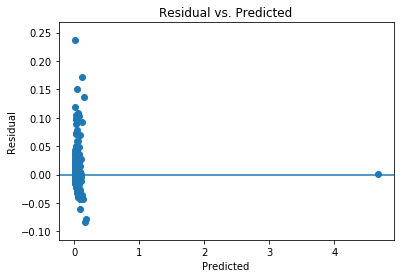

In [35]:
plt.scatter(predict, left)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

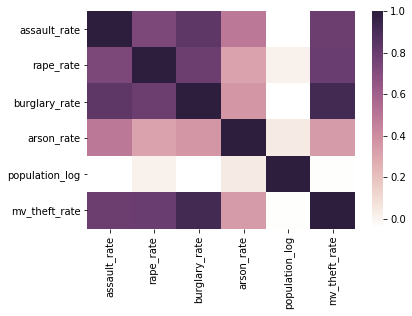

In [36]:
correlation_matrix = X_train.corr()
multicollinearity = sns.heatmap(correlation_matrix, cmap=sns.cubehelix_palette(light=1, as_cmap=True))
ticks = plt.xticks(rotation=90)

#### We are making some progress.  I think we have a good idea of what the data is doing.  Let's clean this up one more time for our final model.

#### We will drop arson (due to it's p-value), and population_log as it's not really telling us anything.  
#### Our final model will include the following features:
* assault rate
* burglary rate
* mv theft rate
* property crime rate

In [37]:
y = model['property_crime_rate']
X = model[['assault_rate','rape_rate','burglary_rate','mv_theft_rate']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [39]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X_train, y_train))


Coefficients: 
 [0.42550462 4.89955278 2.43999767 3.26833123]

Intercept: 
 0.0062687682747066716

R-Squared:
0.9796482549068842


In [40]:
lf = 'property_crime_rate ~ assault_rate + rape_rate + burglary_rate + mv_theft_rate'
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     property_crime_rate   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.980
Method:                  Least Squares   F-statistic:                 1.445e+04
Date:                 Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                         15:55:19   Log-Likelihood:                 4865.5
No. Observations:                 1788   AIC:                            -9717.
Df Residuals:                     1781   BIC:                            -9679.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0158      0.0

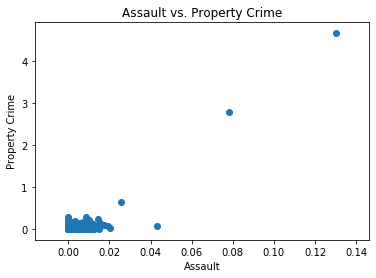

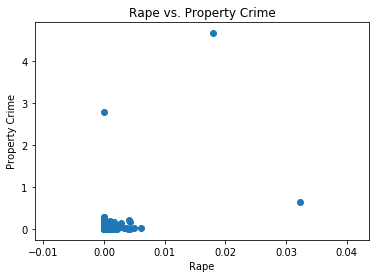

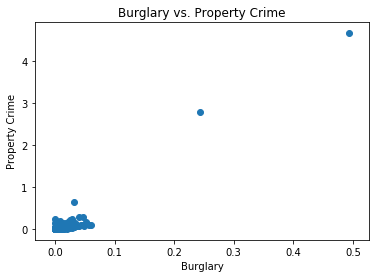

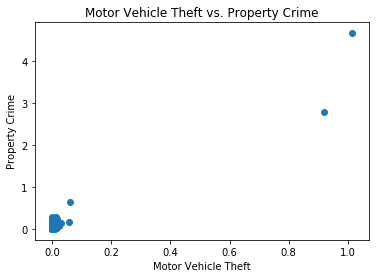

In [41]:
plt.scatter(y=model['property_crime_rate'], x=model['assault_rate'])
plt.ylabel('Property Crime')
plt.xlabel('Assault')
plt.title('Assault vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime_rate'], x=model['rape_rate'])
plt.ylabel('Property Crime')
plt.xlabel('Rape')
plt.title('Rape vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime_rate'], x=model['burglary_rate'])
plt.ylabel('Property Crime')
plt.xlabel('Burglary')
plt.title('Burglary vs. Property Crime')
plt.show()

plt.scatter(y=model['property_crime_rate'], x=model['mv_theft_rate'])
plt.ylabel('Property Crime')
plt.xlabel('Motor Vehicle Theft')
plt.title('Motor Vehicle Theft vs. Property Crime')
plt.show()

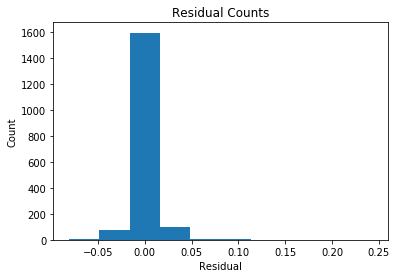

In [42]:
predict = regr.predict(X_train).ravel()
actual = y_train
left = actual - predict

plt.hist(left)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

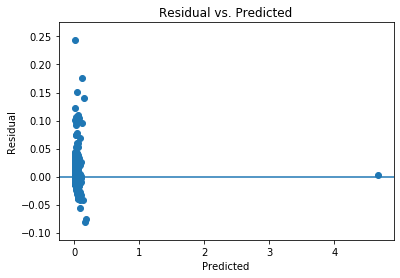

In [43]:
plt.scatter(predict, left)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

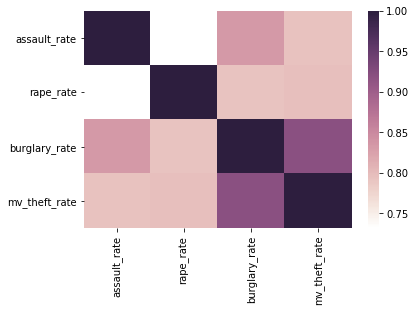

In [44]:
correlation_matrix = X_train.corr()
multicollinearity = sns.heatmap(correlation_matrix, cmap=sns.cubehelix_palette(light=1, as_cmap=True))
ticks = plt.xticks(rotation=90)